In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

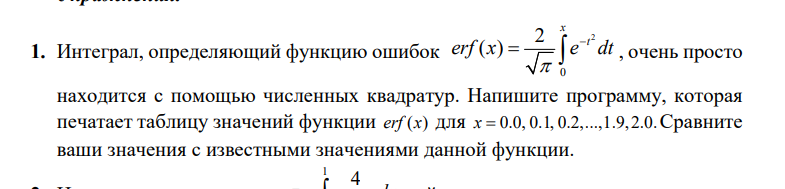

0.0: 0.00000 0.00000
0.1: 0.11246 0.11246
0.2: 0.22271 0.22270
0.3: 0.32864 0.32863
0.4: 0.42843 0.42839
0.5: 0.52056 0.52050
0.6: 0.60396 0.60386
0.7: 0.67795 0.67780
0.8: 0.74231 0.74210
0.9: 0.79719 0.79691
1.0: 0.84306 0.84270
1.1: 0.88064 0.88021
1.2: 0.91083 0.91031
1.3: 0.93461 0.93401
1.4: 0.95296 0.95229
1.5: 0.96686 0.96611
1.6: 0.97718 0.97635
1.7: 0.98470 0.98379
1.8: 0.99007 0.98909
1.9: 0.99383 0.99279
2.0: 0.99643 0.99532


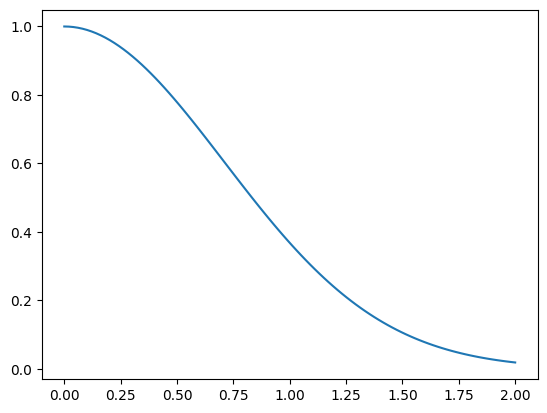

In [94]:
f = lambda t : np.exp(-t ** 2)

x = np.linspace(0, 2, 100)
plt.plot(x, f(x))

def my_erf(x, n=1000):
    h = x / n
    res = 0
    
    for i in range(n):
        res += f(i * h)
    
    res *= 2 / math.sqrt(math.pi) * h
    
    return res

for i in range(21):
    print(f"{i*0.1:.1f}: {my_erf(i*0.1):.5f} {math.erf(i*0.1):.5f}")

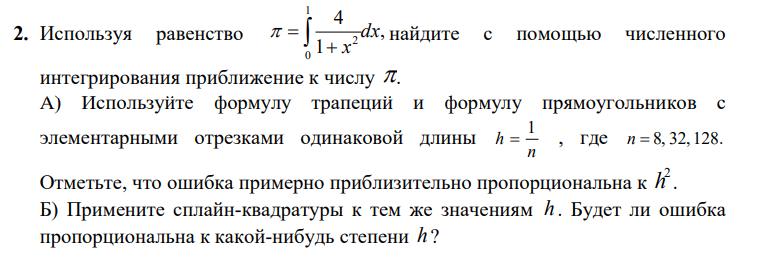

n = 8 - Rect: 3.138988 AE: 0.002604; Trap: 3.142895 AE: 0.001302
n = 32 - Rect: 3.141430 AE: 0.000163; Trap: 3.141674 AE: 0.000081
n = 128 - Rect: 3.141582 AE: 0.000010; Trap: 3.141598 AE: 0.000005


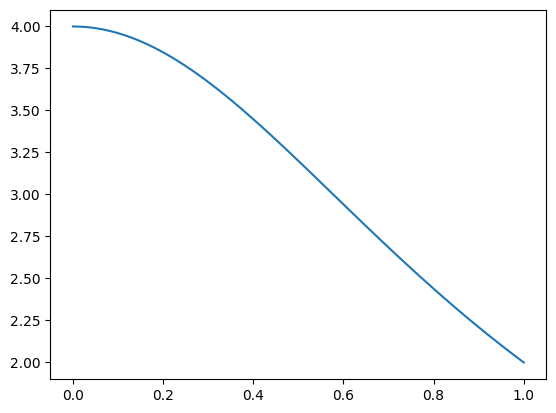

In [24]:
f = lambda x : 4 / (1 + x * x)

x = np.linspace(0, 1, 100)
plt.plot(x, f(x))

def trap_pi(n=1000):
    h = 1 / n
    res = 0.5 * (f(0) + f(1))
    
    for i in range(1, n):
        res += f(i * h)
    
    return res * h

def rect_pi(n=1000):
    h = 1 / n
    res = 0
    
    for i in range(n):
        res += f((i+0.5) * h)
    
    return res * h

for i in [8, 32, 128]:
    t1 = trap_pi(i)
    t2 = rect_pi(i)
    print(f"n = {i} - Rect: {t1:.6f} AE: {abs(math.pi - t1):.6f}; Trap: {t2:.6f} AE: {abs(math.pi - t2):.6f}")

In [29]:
from scipy.interpolate import CubicSpline

for i in [8, 32, 128]:
    x = np.linspace(0, 1, i)
    cs = CubicSpline(x, f(x))
    t = cs.integrate(0, 1)
    print(f"n = {i} - Spline: {t:.15f} AE: {abs(math.pi - t):.15f}")

n = 8 - Spline: 3.141634741480366 AE: 0.000042087890573
n = 32 - Spline: 3.141592695686513 AE: 0.000000042096720
n = 128 - Spline: 3.141592653627586 AE: 0.000000000037793


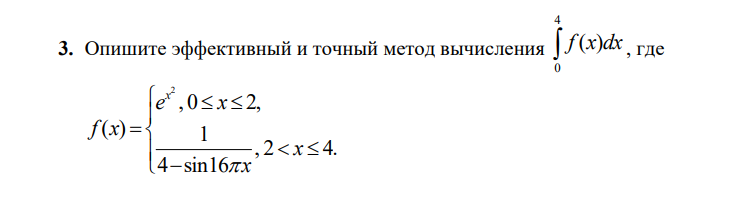

In [87]:
f = lambda x: np.where(x <= 2, np.exp(x*x), 1/(4 - np.sin(16*np.pi*x)))
ans = 16.969025545

import numpy as np
from scipy.integrate import quad

res, er = quad(f, 0, 4, limit=100)


print(f"Ans: {res}; AE: {abs(ans-res)};")

Ans: 16.96902554500153; AE: 1.5276668818842154e-12;


In [83]:
import numpy as np
from scipy.interpolate import CubicSpline

N = 10000000

x = np.linspace(0, 4, N)


cs = CubicSpline(x, f(x))

# Вычисление интегралов на двух интервалах
res = cs.integrate(0, 4)

print(f"Ans: {res}; AE: {abs(ans-res)}")

Ans: 16.96902554499694; AE: 3.062439191126032e-12
